# BPN Wet Grass

This notebook tests the class BayesPetriNet (BPN) based on the famous "Wet Grass" Bayesian network (a diamond with an arrow from the east to the west node.
We consider a single transition "b". We also consider the firing transition sequence ["a", "b", "c", "d"]

In [1]:
# this makes sure it starts looking for things from the Bayes_Petri_Net folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\Bayes_Petri_Net


In [2]:
from BayesPetriNet import *

In [3]:
fname = "dot_atlas/BPN_wet_grass.txt"   
fname1 = "dot_atlas/BPN_wet_grass(1).txt"  
bnet_pa_to_children = {"a": ["b", "c"],
                       "b": ["c", "d"],
                       "c": ["d"]}

bnet_nds= ['a', 'b', 'c', 'd']
cond_bnet_nds= None
bnet_pa_to_children= {'c': ['d'], 'b': ['c', 'd'], 'a': ['b', 'c', 'd']}
bnet_arrows= [('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('c', 'd')]
buffer_nds= ['a_b', 'b_a', 'a_c', 'c_a', 'b_c', 'c_b', 'b_d', 'd_b', 'c_d', 'd_c']
petri_arrows= [('a', 'a_b'), ('a_b', 'b'), ('b', 'b_a'), ('b_a', 'a'), ('a', 'a_c'), ('a_c', 'c'), ('c', 'c_a'), ('c_a', 'a'), ('b', 'b_c'), ('b_c', 'c'), ('c', 'c_b'), ('c_b', 'b'), ('b', 'b_d'), ('b_d', 'd'), ('d', 'd_b'), ('d_b', 'b'), ('c', 'c_d'), ('c_d', 'd'), ('d', 'd_c'), ('d_c', 'c')]
inv_petri_arrows= [('b', 'b_a'), ('b_a', 'a'), ('c', 'c_a'), ('c_a', 'a'), ('c', 'c_b'), ('c_b', 'b'), ('d', 'd_b'), ('d_b', 'b'), ('d', 'd_c'), ('d_c', 'c')]
buffer_nd_to_content= {'a_b': 1, 'b_a': 1, 'a_c': 1, 'c_a': 1, 'b_c': 1, 'c_b': 1, 'b_d': 1, 'd_b': 1, 'c_d': 1, 'd_c': 1}
petri_arrow_to_capacity= {('a', 'a_b'): 1, ('a_b', 'b'): 1, ('b', 'b_a'): 1, ('b_a', 'a'): 1, ('a', 'a_c'): 1, ('a_c', 'c'): 1, ('c', 'c_a'): 

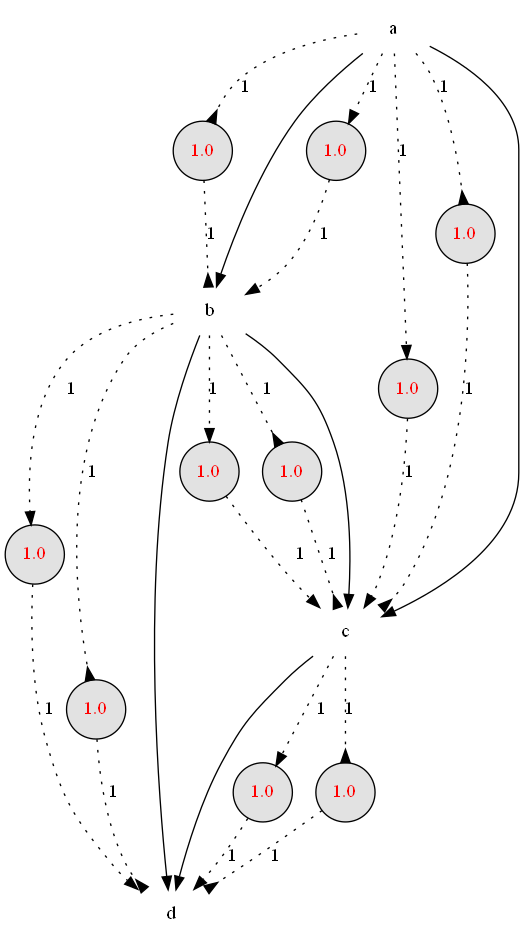

In [4]:
bpnet = BayesPetriNet(bnet_pa_to_children, verbose=True)
bpnet.draw(jupyter=True)

current markings: [('a_b', '1.00'), ('b_a', '1.00'), ('a_c', '1.00'), ('c_a', '1.00'), ('b_c', '1.00'), ('c_b', '1.00'), ('b_d', '1.00'), ('d_b', '1.00'), ('c_d', '1.00'), ('d_c', '1.00')]


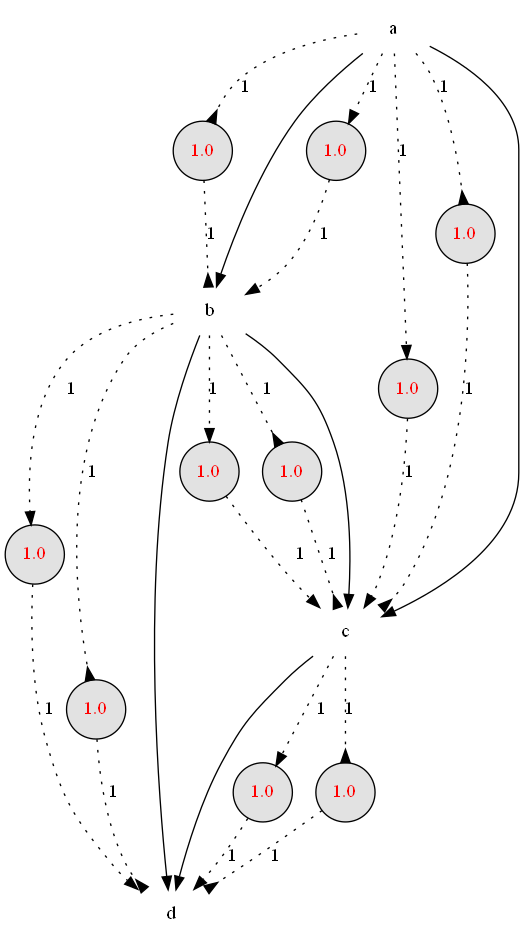

Fired transition a.
current markings: [('a_b', '2.00'), ('b_a', '0.00'), ('a_c', '2.00'), ('c_a', '0.00'), ('b_c', '1.00'), ('c_b', '1.00'), ('b_d', '1.00'), ('d_b', '1.00'), ('c_d', '1.00'), ('d_c', '1.00')]


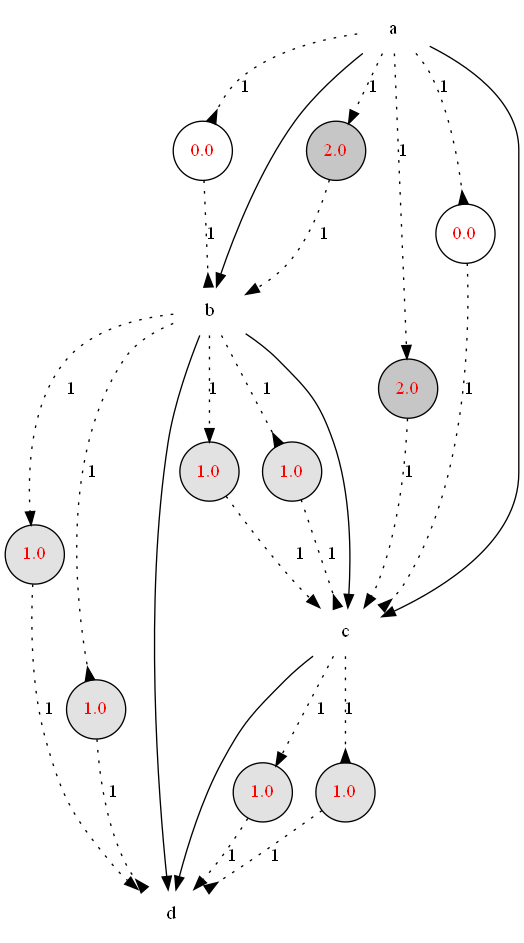

In [5]:
bpnet = BayesPetriNet(bnet_pa_to_children)
tra = bpnet.get_tra_from_name("a")
bpnet.describe_current_markings()
bpnet.draw(jupyter=True)
bpnet.fire_transition(tra)
bpnet.describe_current_markings()
bpnet.draw(jupyter=True)

In [6]:
firing_tras0=bpnet.get_firing_tras_from_names(["a", "b", "c", "d"])

In [7]:
bpnet = BayesPetriNet(bnet_pa_to_children)
bpnet.fire_transition_list(firing_tras=firing_tras0)

Fired transition a.
Fired transition b.
Fired transition c.
Fired transition d.
current markings: [('a_b', '1.00'), ('b_a', '1.00'), ('a_c', '1.00'), ('c_a', '1.00'), ('b_c', '1.00'), ('c_b', '1.00'), ('b_d', '1.00'), ('d_b', '1.00'), ('c_d', '1.00'), ('d_c', '1.00')]


In [8]:
from widget_utils import *
 
bpnet = BayesPetriNet(bnet_pa_to_children)
step_num = 0
refresh = True

create_step_button(
    refresh, 
    bpnet.inner_step, 
    firing_tras=firing_tras0)

Button(description='Step', style=ButtonStyle(button_color='limegreen'))

Output()